<a href="https://colab.research.google.com/github/Dasrunaik/AssignMents-ExcelR/blob/main/Assignment_20_forecasting_TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loading dataset

In [69]:
df=pd.read_csv('/content/exchange_rate.csv',)
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [70]:
df.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [71]:
df.shape

(7588, 2)

In [72]:
df.describe()

,Ex_rate
count,7588.000000
mean,0.776974
std,0.136620
min,0.483297
25%,0.701422
50%,0.761377
75%,0.873477
max,1.102536


In [73]:
df.dtypes

,0
date,object
Ex_rate,float64


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


Initial plotting

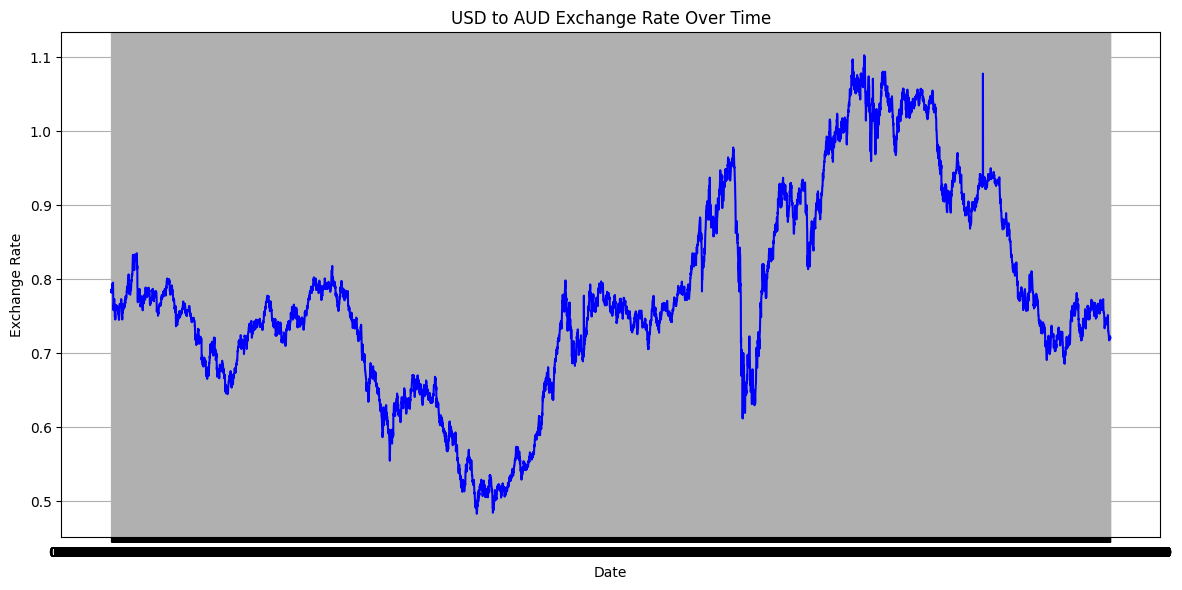

In [75]:
plt.figure(figsize=(12,6))
plt.plot(df['date'],df['Ex_rate'],color='blue')
plt.title("USD to AUD Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.tight_layout()
plt.show()

checking for missing values

In [76]:
df.isnull().sum()

,0
date,0
Ex_rate,0


In [77]:
df.fillna(method='ffill')

/tmp/ipython-input-77-1193302488.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill')


,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


ARIMA Modeling  ((AutoRegressive Integrated Moving Average)

In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA


ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function)

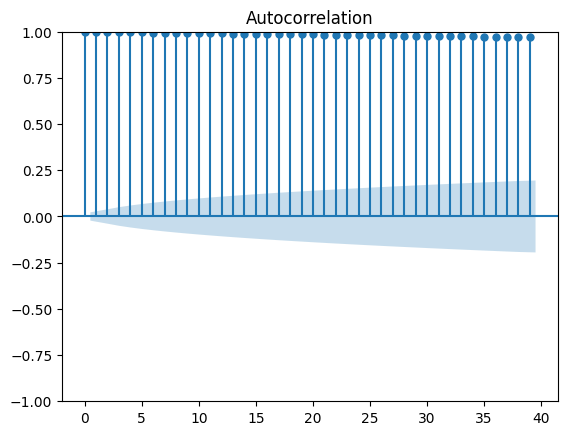

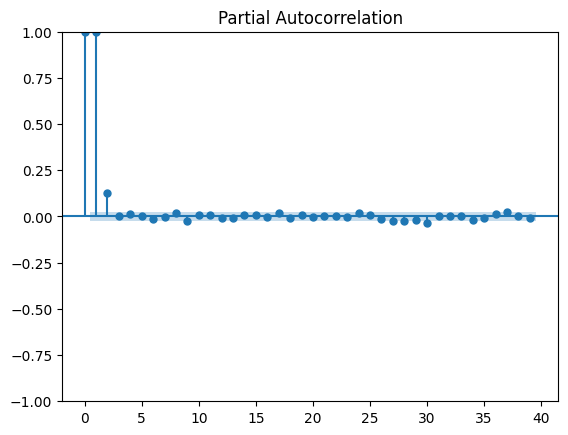

In [79]:
plot_acf(df['Ex_rate'])
plot_pacf(df['Ex_rate'])
plt.show()

Fit ARIMA (example with p=1, d=1, q=1)

In [80]:
model_arima = ARIMA(df['Ex_rate'], order=(1,1,1))
result_arima = model_arima.fit()

In [81]:
result_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Thu, 19 Jun 2025   AIC                         -56102.322
Time:                        13:34:49   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.000    3.58e-05    3.62e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):           2865078.33
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               2.97   Skew:                             0.24
Prob(H) (two-sided):                  0.00   Kurtosis:                        98.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Residual diagnostics

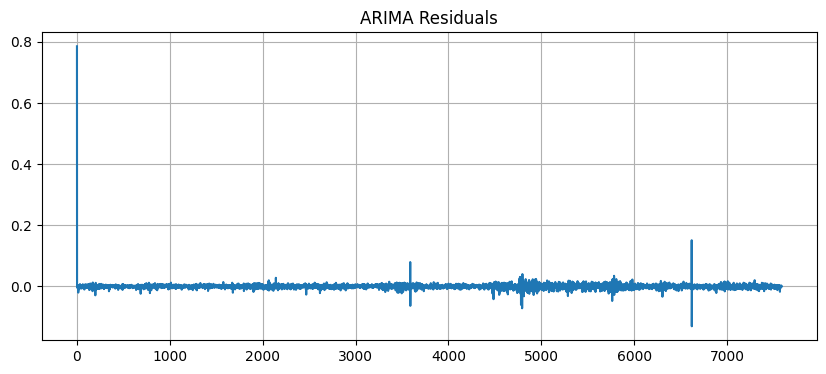

In [82]:
residuals = result_arima.resid
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title("ARIMA Residuals")
plt.grid()
plt.show()

**Forecast**

Generate forecast

In [83]:
forecast_arima = result_arima.forecast(steps=30)


# Plot directly from the forecast Series

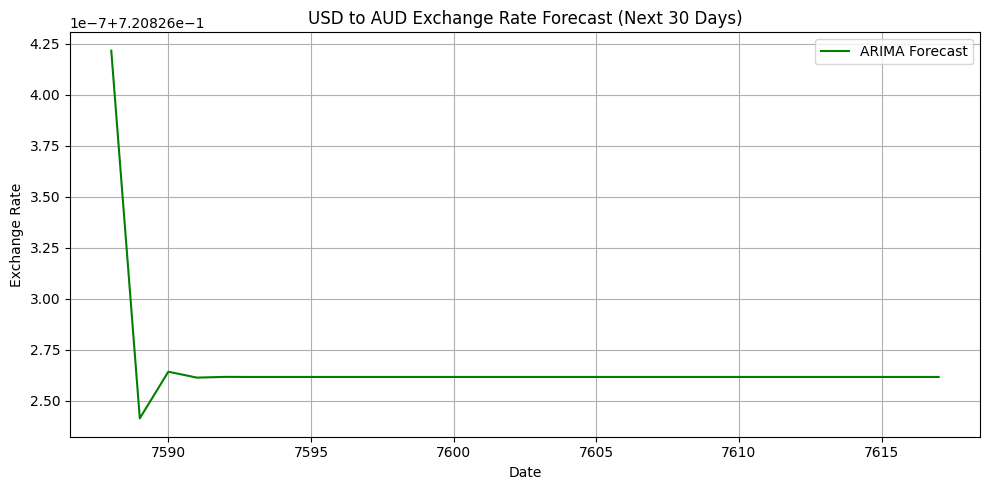

In [84]:
plt.figure(figsize=(10, 5))
plt.plot(forecast_arima, label="ARIMA Forecast", color="green")
plt.title("USD to AUD Exchange Rate Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

 Exponential Smoothing

In [85]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

Holt's Linear Trend Model

In [86]:
model_es = ExponentialSmoothing(df['Ex_rate'], trend='add', seasonal=None)
result_es = model_es.fit()
forecast_es = result_es.forecast(30)

Plotting

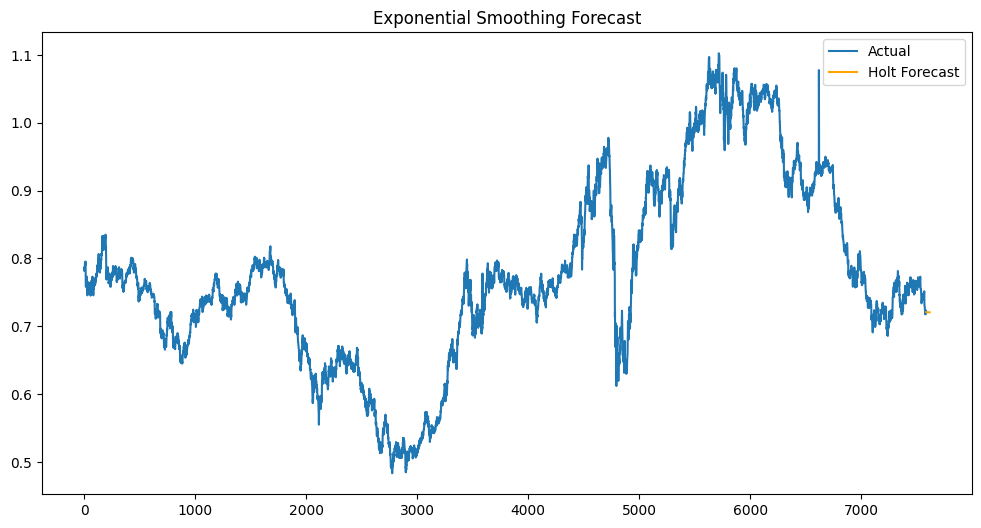

In [87]:
plt.figure(figsize=(12,6))
plt.plot(df['Ex_rate'], label='Actual')
plt.plot(forecast_es, label='Holt Forecast', color='orange')
plt.legend()
plt.title("Exponential Smoothing Forecast")
plt.show()

Evaluation

In [88]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [94]:
# Extract the last 30 actual numeric values
actual_last30 = df['Ex_rate'].iloc[-30:].values

In [95]:
# Ensure pred_arima is a numeric array (e.g., from result_arima.forecast)
pred_arima = result_arima.forecast(steps=30).values  # already numeric

In [96]:
def evaluate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, rmse, mape

In [97]:
# Evaluate forecast accuracy
mae_a, rmse_a, mape_a = evaluate(actual_last30, pred_arima)

In [101]:
print(f"ARIMA - MAE: {mae_a:.4f}, RMSE: {rmse_a:.4f}, MAPE: {mape_a:.2f}%")

ARIMA - MAE: 0.0127, RMSE: 0.0170, MAPE: 1.71%


In [100]:
print(f"Exponential Smoothing - MAE: {mae_a:.4f}, RMSE: {rmse_a:.4f}, MAPE: {mape_a:.2f}%")

Exponential Smoothing - MAE: 0.0127, RMSE: 0.0170, MAPE: 1.71%
